In [1]:
#import the standrad libraries
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Read the dataset
data=pd.read_csv('../input/glass-identification-data-set/glass.csv')
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
#data describe
data.describe().style.background_gradient(cmap='ocean_r')

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
#correaltion matrix
corr=data.corr().style.background_gradient(cmap='winter')
corr

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<AxesSubplot:>

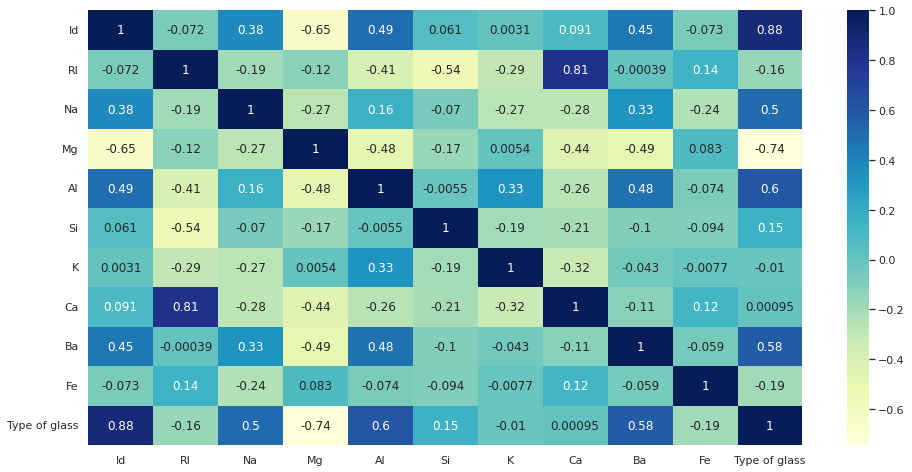

In [6]:
#visualize the heatmap
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

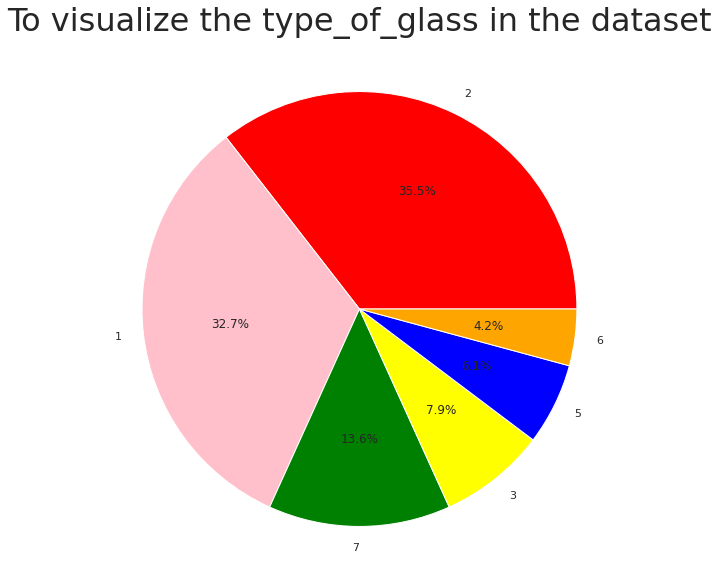

In [7]:
type_glass=data['Type of glass'].value_counts()
plt.figure(figsize=(16,10))
plt.pie(type_glass,labels=['2','1','7','3','5','6'],colors=['red','pink','green','yellow','blue','orange'], autopct='%1.1f%%',)
plt.title("To visualize the type_of_glass in the dataset",fontsize=32)
plt.show()

In [8]:
data.rename(columns={'Type of glass':'type_of_glass'},inplace=True)

In [9]:
data.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'type_of_glass'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mg', ylabel='count'>

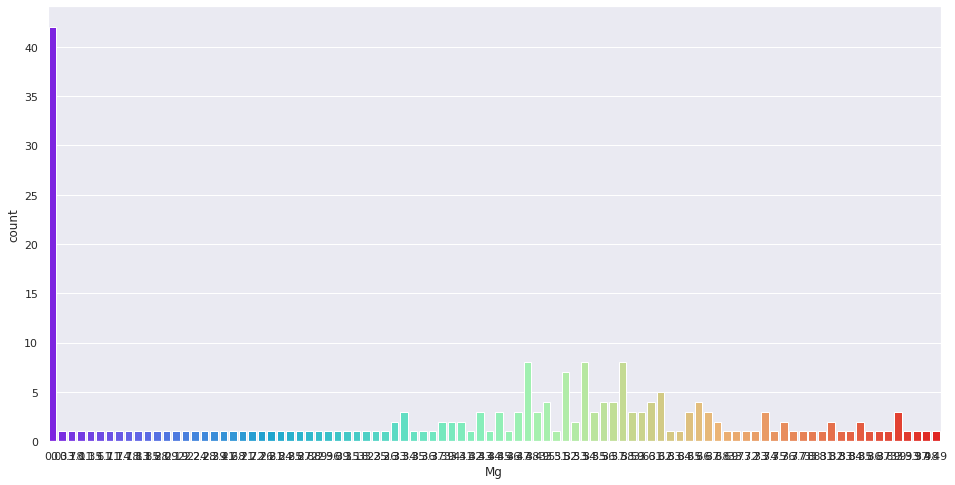

In [10]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(data['Mg'],palette='rainbow')

<AxesSubplot:xlabel='Si', ylabel='Count'>

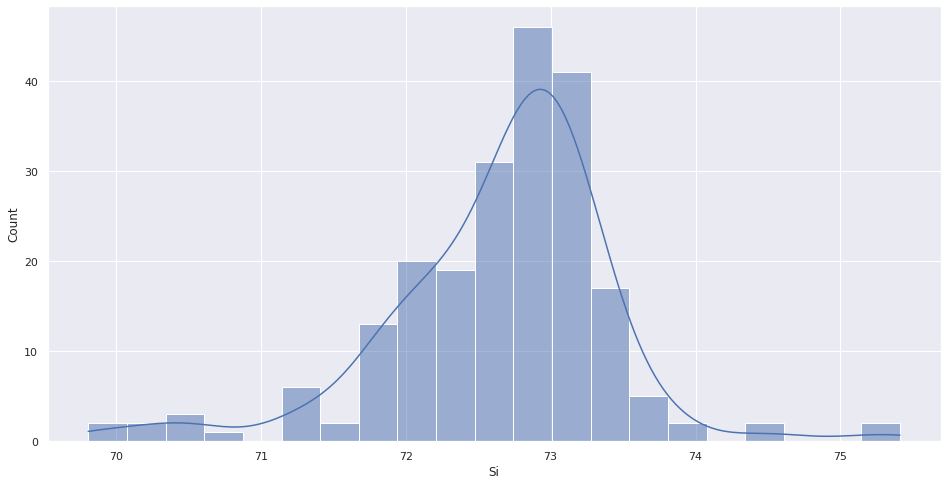

In [11]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data['Si'],palette='rainbow',kde=True)

<AxesSubplot:xlabel='Al', ylabel='Count'>

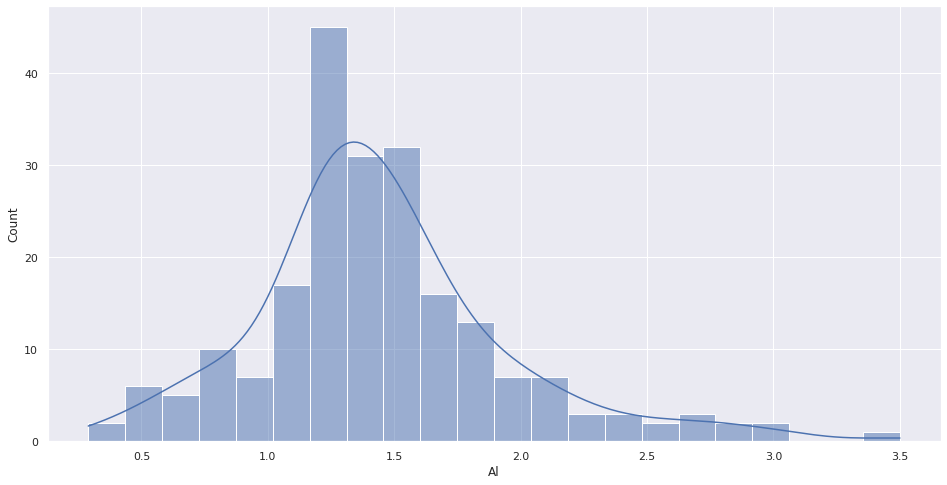

In [12]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data['Al'],palette='rainbow',kde=True)

<AxesSubplot:xlabel='Na', ylabel='Density'>

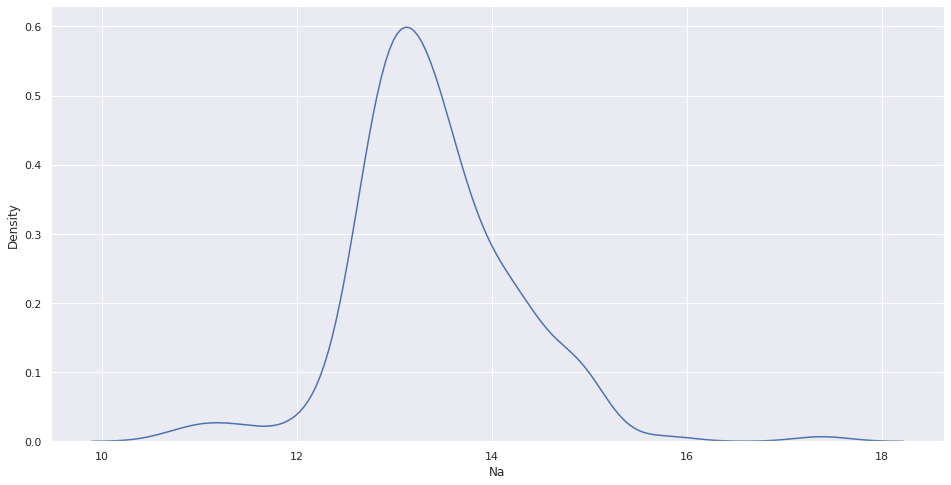

In [13]:
sns.set(rc={'figure.figsize':(16,8)})
sns.kdeplot(data['Na'],palette='rainbow')

# Modeling

In [14]:
#Divided the data into x and y
X=data.drop(['type_of_glass'],axis=1)
y=data['type_of_glass']

In [15]:
#divided the data into train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#Install the logisticregession
logistic=LogisticRegression()
#fit the train dataset
logistic.fit(X_train,y_train)
#prediction
logistic_pred=logistic.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
print(f'the accuracy_score is {logistic.score(X_test,y_test)*100:.2f}')
print(f'the accuracy_score is {logistic.score(X_train,y_train)*100:.2f}')
print(f'the accuracy_score is {accuracy_score(y_test,logistic_pred)*100:.2f}')

the accuracy_score is 100.00
the accuracy_score is 99.42
the accuracy_score is 100.00


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



<AxesSubplot:>

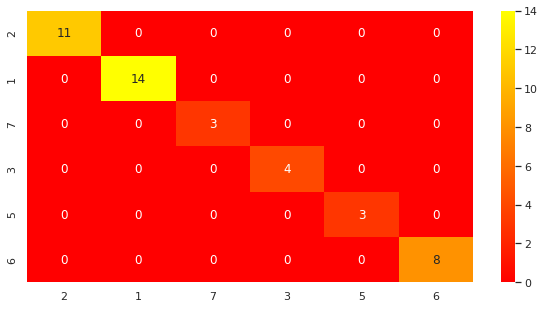

In [18]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='autumn',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [19]:
#install the tree model
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
#prediction
tree_pred=tree.predict(X_test)

In [20]:
print(f'The accuracy_score is {tree.score(X_test,y_test)*100:.2f}')
print(f'The accuracy_score is {tree.score(X_train,y_train)*100:.2f}')
print(f'The accuracy_score is {accuracy_score(y_test,tree_pred)*100:.2f}')

The accuracy_score is 100.00
The accuracy_score is 100.00
The accuracy_score is 100.00


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



<AxesSubplot:>

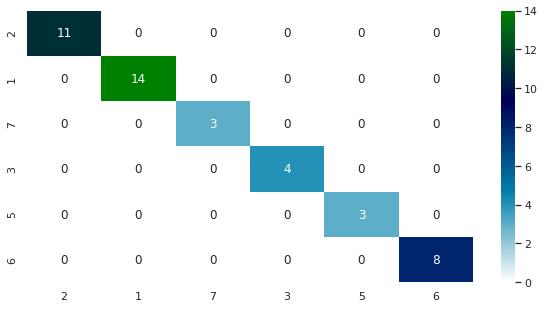

In [21]:
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='ocean_r',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [22]:
#install the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the classifier
random=RandomForestClassifier()
#fit the train dataset
random.fit(X_train,y_train)
#prediction
random_pred=random.predict(X_test)

In [23]:
print(f'The accuracy_score is {random.score(X_test,y_test)*100:.2f}')
print(f'The accuracy_score is {random.score(X_train,y_train)*100:.2f}')
print(f'The accuracy_score is {accuracy_score(y_test,random_pred)*100:.2f}')

The accuracy_score is 100.00
The accuracy_score is 100.00
The accuracy_score is 100.00


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



<AxesSubplot:>

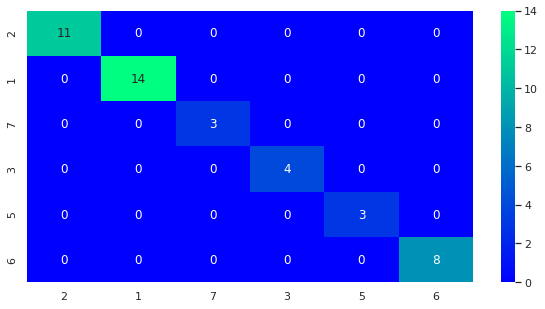

In [24]:
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='winter',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [25]:
#install the Kneighborsclassifier from the sklearn
from sklearn.neighbors import KNeighborsClassifier
#Install the KNeighborsClassifier
knn = KNeighborsClassifier()
#And the fit the training dataset
knn.fit(X_train, y_train)
#prediction
knn_pred=knn.predict(X_test)

In [26]:
#Check the test score and train score to the model
print(f'The KNeighborsClassifier model test score is {knn.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The KNeighborsClassifier model train scores is {knn.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The KNeighborsClassifier accuracy_score {accuracy_score(y_test,knn_pred)*100:.2f}')

The KNeighborsClassifier model test score is 95.35
The KNeighborsClassifier model train scores is 98.83
The KNeighborsClassifier accuracy_score 95.35


              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.95        43
   macro avg       0.95      0.94      0.94        43
weighted avg       0.96      0.95      0.95        43



<AxesSubplot:>

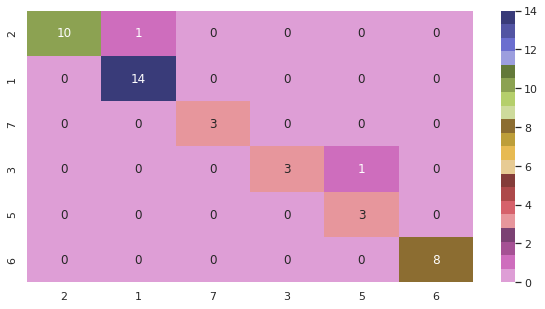

In [27]:
print(classification_report(y_test,knn_pred))
#confusion_matrix
cn=confusion_matrix(y_test,knn_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='tab20b_r',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])